In [1]:
from __future__ import division

import affine
import contextily
import fiona
import geopandas as gpd

import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import FormatStrFormatter
from matplotlib.pyplot import cm                        # color maps
from matplotlib.patches import Ellipse                  # plot an ellipse

import os
import numpy as np
import pyproj
import pandas as pd

import rasterio 
from rasterio.crs import CRS
from rasterio.enums import Resampling
from rasterio.features import rasterize
import rasterio.mask
from rasterio.plot import show
from rasterio.transform import from_bounds
from rasterio import shutil as rio_shutil
from rasterio.vrt import WarpedVRT
from rasterio import Affine

from requests import Request

from scipy.interpolate import interpn
from scipy.interpolate import griddata
from scipy import stats
from scipy.stats import norm
from scipy.spatial import Delaunay, ConvexHull
from scipy.spatial.distance import cdist

import sys
import shapely
from shapely.geometry import Point
from shapely.geometry import mapping, Polygon

from owslib.wcs import WebCoverageService



In [39]:
name = 'GH_01'

shapefilename = "ref_%s_contours.shp"%name
print(shapefilename)

wt_contour_fldr = os.path.join(r'C:\Users\mar886\WaterTableProject\Willunga\willunga_wt\output_data\wt_drawn_contours',
                              shapefilename)
wt_contour = gpd.read_file(wt_contour_fldr)

crs_wt_contours = 'epsg:4283'

ref_GH_01_contours.shp


<AxesSubplot:>

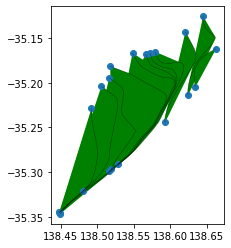

In [40]:
fig, ax = plt.subplots(1,1)
wt_contour.plot(ax=ax, color="k", alpha=0.5, linewidth=0.5, label="All watertable contours")
wt_contour.convex_hull.plot(ax=ax, color="green")
wt_contour.boundary.plot(ax=ax)


The issue is that it is seeing them all as separate shapefiles I want them all together

### Create a multi-linestring

In [41]:
list_of_strings = []
for i in range(len(wt_contour.geometry)):
    list_of_strings.append(wt_contour.geometry[i])
    
list_of_strings

multlinestring = shapely.geometry.MultiLineString(list_of_strings)
print(type(multlinestring))

<class 'shapely.geometry.multilinestring.MultiLineString'>


In [42]:
multlinestring.convex_hull

sa_df = pd.DataFrame()
sa_df["geometry"] = [multlinestring.convex_hull]
sa_gdf = gpd.GeoDataFrame(sa_df, geometry='geometry', crs=crs_wt_contours)

In [43]:
print("Study area gdf type is: %s " % type(sa_gdf))
print("Water table contour crs: %s" %wt_contour.crs)
print("Study are crs: %s" %sa_gdf.crs)

Study area gdf type is: <class 'geopandas.geodataframe.GeoDataFrame'> 
Water table contour crs: epsg:4283
Study are crs: epsg:4283


In [44]:
studyareashapefilename = "studyarea_%s.shp"%name
print(studyareashapefilename)

studyarea_GH_01.shp


In [45]:
sa_gdf.to_file(os.path.join(r'C:\Users\mar886\WaterTableProject\Willunga\willunga_wt\output_data\raster_shapes', 
                            studyareashapefilename))